In [144]:
import pandas as pd
import csv
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
source = "https://raw.githubusercontent.com/LauraDanielamg/TechnicalTestBipiCSV/main/Customers.csv"

# Prueba técnica para Bipicar.com
---
## Instrucciones/preguntas:

Dado el [dataset](https://github.com/LauraDanielamg/TechnicalTestBipiCSV/blob/main/Customers.csv) que se adjunta, contestar las siguientes preguntas:

### - ¿Qué método de pandas utilizarías para cargar la información en un dataframe?

In [145]:
df = pd.read_csv(source)

### - ¿Qué alternativa a pandas podrías utilizar?

Se puede recurrir al módulo *csv* y a la función *urlopen*:

In [211]:
def read_csv(source):
    try:
        with urlopen(source) as csvfile:
            reader = csv.reader(csvfile.read().decode('utf-8').splitlines())
            content = [row for row in reader]
        return content
    except Exception as e:
        print("Error de lectura:", e)
        return None

content = read_csv(source)

if content:
    print("Leido y guardado como una lista de listas en la variable content")
else:
    print("Error de lectura")


Leido y guardado como una lista de listas en la variable content


### - ¿Qué procedimientos harías para hacer una limpieza de los datos?

Tomaría varios pasos:

- Manejar los valores faltantes.
- Verificar duplicados.
- Verificar que los datos estén en los formatos correctos.
- Normalización y estandarización.

Este dataset esta bastante limpio, sin embargo, podemos hacer algunas comprobaciones:

In [147]:
data_types = df.dtypes
print(data_types)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object


In [148]:
# Verificamos si hay valores duplicados
def duplicates(df):
    if df.duplicated().any():
        print('Hay valores duplicados en el DataFrame')
    else:
        print('No hay valores duplicados en el DataFrame')
duplicates(df)

No hay valores duplicados en el DataFrame


In [149]:
# Verificamos si hay valores faltantes
def missing_values(df):
    if df.isnull().any().any():
        print('Hay valores faltantes en el DataFrame')
    else:
        print('No hay valores faltantes en el DataFrame')

missing_values(df)

Hay valores faltantes en el DataFrame


In [150]:
# Verificamos que los valores de la columna 'Gender'
unique_values = df['Gender'].unique()
print(unique_values)

['Male' 'Female']


In [151]:
# Verificamos los valores de la columna 'Profession'
unique_values = df['Profession'].unique()
print(unique_values)

['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]


In [152]:
# Tenemos algunos NaN, los rellenamos con "N/A"
df['Profession'] = df['Profession'].fillna("N/A")

In [153]:
#Verificamos si esto arregla los valores faltantes
missing_values(df)

No hay valores faltantes en el DataFrame


* Por supuesto, también debemos **verificar la coherencia de los datos**, por ejemplo:

In [154]:
experience_greater_than_age = df['Work Experience'] > df['Age']
df_experience_greater_than_age = df[experience_greater_than_age]
print("Tenemos", len(df_experience_greater_than_age), "clientes con más experiencia que edad")

Tenemos 81 clientes con más experiencia que edad


Esta situación sugiere que los datos podrían estar incompletos o incorrectos, lo que podría afectar la calidad de los análisis y conclusiones obtenidos. Por lo tanto, recomendaría considerar la exclusión de estos datos para evitar posibles sesgos o interpretaciones erróneas.

Una posible solución es establecer criterios para determinar el inicio de la vida laboral de los clientes. Sugiero establecer que la edad de entrada al mundo laboral sea la diferencia entre la edad y la experiencia.


In [155]:
df['Age of Work Entry'] = df['Age'] - df['Work Experience']

In [156]:
def plot_age_of_work_entry(df):
    """
    This function creates a boxplot of the age of work entry for a given DataFrame.
    :param df: DataFrame containing the relevant data.
    :return: A boxplot of the age of work entry.
    """
    # Crear el boxplot
    plt.boxplot(df['Age of Work Entry'])

    # Agregar título y etiquetas de ejes
    plt.title('Boxplot de la Edad de Inicio Laboral')
    plt.ylabel('Edad')
    plt.xticks([1], [''])

    # Mostrar el boxplot
    plt.show()

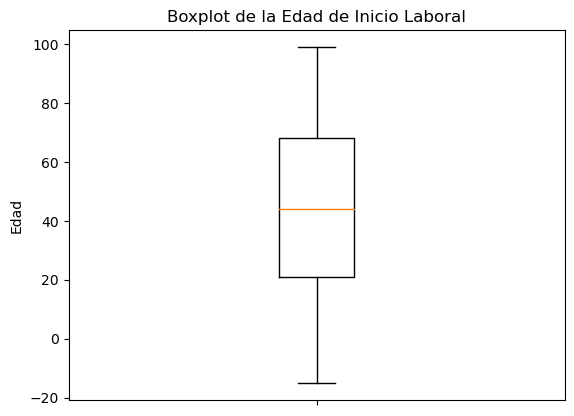

In [157]:
plot_age_of_work_entry(df)

Aqui podemos ver que en la distribución de nuestros datos tenemos edades de inicio laboral negativas.

Lo podemos corregir de la siguiente manera:

In [158]:
experience_less_than_age = df['Work Experience'] <= df['Age']
df = df[experience_less_than_age]

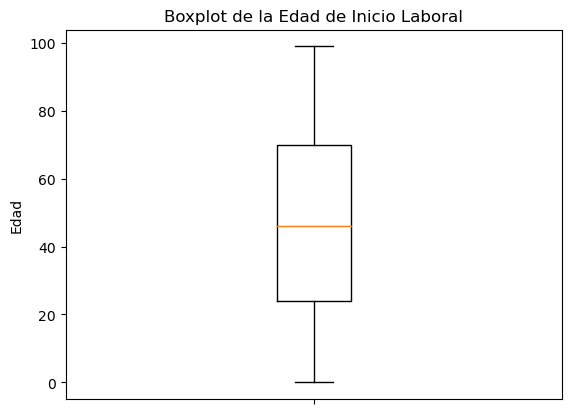

In [159]:
plot_age_of_work_entry(df)

La medida adoptada fue establecer que **la experiencia laboral no puede ser mayor que la edad actual del cliente**. Este enfoque ha permitido reducir el tamaño del bigote inferior en el boxplot y mejorar la calidad de los datos.

Sin embargo, aún hay otras cuestiones que deben ser abordadas.

Por ejemplo, se ha detectado la posibilidad de que en algunas profesiones que requieren una titulación(médicos, abogados..), existan clientes menores de 18 años (en este sentido, es importante tener en cuenta que hay algunas actividades que permiten a niños desempeñar ciertos roles sin necesidad de contar con una titulación específica)

Por lo tanto, es necesario establecer criterios adicionales para verificar la validez de la información en estos casos, a fin de evitar distorsiones en los resultados.

In [160]:
degree_needed = df['Profession'].isin(['Healthcare', 'Engineer','Lawyer','Executive','Doctor','Marketing'])
under_18 = df['Age'] < 18
df_degree_needed_under_18 = df.loc[degree_needed & under_18]
print("Tenemos", len(df_degree_needed_under_18), "clientes menores de 18 años con profesiones que requieren un título")

Tenemos 135 clientes menores de 18 años con profesiones que requieren un título


A fin de establecer criterios claros y uniformes en el analisis, propongo establecer que la edad mínima para comenzar a trabajar sea de 16 años.

In [161]:
under_16_work_entry =  df['Age of Work Entry'] < 16
df_under_16_work_entry = df[under_16_work_entry & degree_needed]
print("Tenenos", len(df_under_16_work_entry), "clientes que han comenzado a trabajar por debajo de la edad minima y en una profesion que requiere un título")

Tenenos 152 clientes que han comenzado a trabajar por debajo de la edad minima y en una profesion que requiere un título


En resumen, aunque el conjunto de datos parece estar bastante limpio, presenta problemas de coherencia que deben ser abordados a fondo para garantizar su calidad. Se han encontrado casos como personas que comienzan su vida laboral con más de 80 años o médicos con tan solo 6 años de edad, lo que indica que hay inconsistencias en los datos que necesitan ser controladas.

### Escribe un script en Python apoyado en pandas y en cualquier librería de graficación que conozcas que en tiempo de ejecución realice lo siguiente:

#### Calcular el número y porcentaje sobre el total absoluto de Mujeres monoparentales que han gastado más de 15.000 dólares:
Primero tenemos que calcular el gasto. Sugiero determinar que el Spending Score nos indica la proporcion del Annual Income que se gasta por año, por lo tanto:

In [171]:
df['Annual Spending'] = df['Spending Score (1-100)'] * df['Annual Income ($)'] / 100

Al revisar los datos, se puede ver que no se incluyen variables que permitan determinar con certeza si una mujer es monoparental o no, ya que solo se dispone del dato de "Family Size" que va de 1 a 9, sin conocer el número de hijos o si tienen cónyuge o pareja.

Una posible estrategia es considerar el atributo Family Size como un indicador del tamaño de la unidad familiar y, en consecuencia, asumir que todas las mujeres con un Family Size igual a 1 son madres solteras. Por tanto, se propone filtrar el conjunto de datos en función de estos criterios y, posteriormente, calcular la cantidad de mujeres que se ajustan a la categoría de madres solteras.

In [172]:
females = df['Gender'] == 'Female'
single_parent = df['Family Size'] == 1
annual_spending_over_15K = df['Annual Spending'] > 15000
annual_spending_under_15K = df['Annual Spending'] < 15000

In [173]:
df_females_single_parents = df[females & single_parent]
total_females_single_parents = len(df_females_single_parents)
print("Mujeres monoparentales: ", total_females_single_parents)

Mujeres monoparentales:  170


* Tambien nos interesa la cantidad de mujeres monoparentales que gastan más de 15K

In [174]:
df_females_single_parents_over_15k = df[females & single_parent & annual_spending_over_15K]
num_females_single_parents_over_15k = len(df_females_single_parents_over_15k)

print("Mujeres monoparentales que han gastado más de 15.000 dólares: ", num_females_single_parents_over_15k)

Mujeres monoparentales que han gastado más de 15.000 dólares:  137


* Comparamos los gastos entre mujeres monoparentales

In [175]:
df_females_single_parents_under_15k = df[females & single_parent & annual_spending_under_15K]
num_females_single_parents_under_15k = len(df_females_single_parents_under_15k)

In [176]:
#Datos para los graficos
bar_data = [total_females_single_parents, num_females_single_parents_over_15k]
bar_labels = ['Total de mujeres monoparentales', 'Mujeres monoparentales que gastan más de 15k']
pie_data = [num_females_single_parents_under_15k, num_females_single_parents_over_15k]
pie_labels = ["Mujeres monoparentales con gastos inferiores a 15K", "Mujeres monoparentales con gastos superiores a 15K"]
colors = ['blue', 'lightblue']

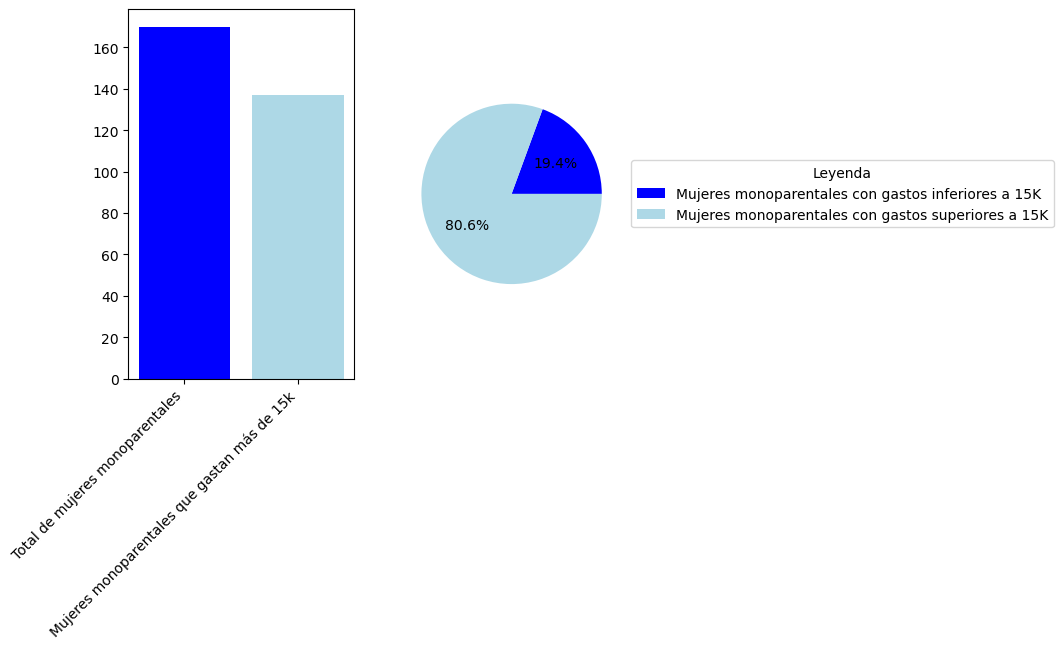

<Figure size 1200x1200 with 0 Axes>

In [177]:
#Creamos subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig = plt.figure(figsize=(12, 12))

#Grafico de barras
ax1.bar(bar_labels, bar_data, color=colors)
ax1.set_xticks(np.arange(len(bar_labels)))
ax1.set_xticklabels(bar_labels, rotation=45, ha='right')

# Gráfico de pie
ax2.pie(pie_data,  colors = colors, autopct='%1.1f%%')
ax2.legend(title='Leyenda', labels = pie_labels , loc='center left', bbox_to_anchor=(1, 0.5))

# Ajustar la disposición de los subplots
fig.tight_layout()

# Mostrar la figura completa
plt.show()

* Y el porcentaje de mujeres monoparentales con gastos sobre 15K sobre el total clientes:

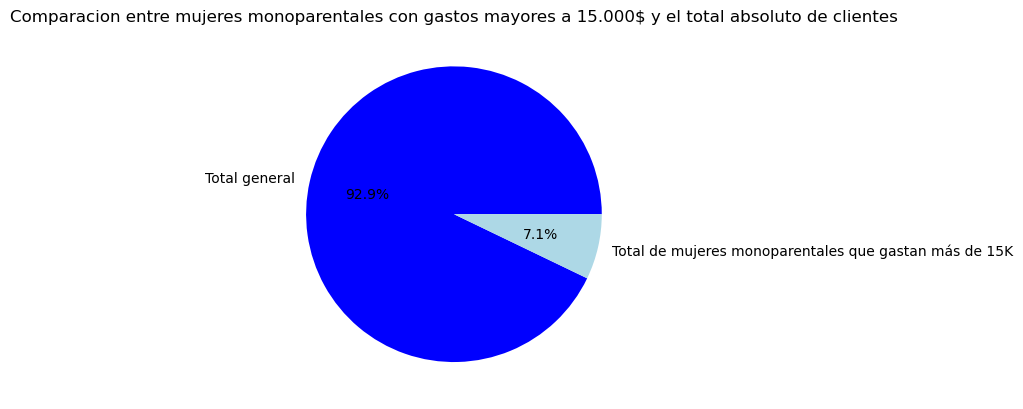

In [178]:
df_non_female_single_parent_over_15k = females & single_parent & annual_spending_over_15K
df_non_female_single_parent_over_15k = df_non_female_single_parent_over_15k.apply(lambda x: not x)
df_non_female_single_parent_over_15k = df[df_non_female_single_parent_over_15k]

general_total_not_female_single_parent_over_15k = len(df_non_female_single_parent_over_15k)

plt.pie([general_total_not_female_single_parent_over_15k, num_females_single_parents_over_15k], labels=["Total general", "Total de mujeres monoparentales que gastan más de 15K"],colors=colors, autopct='%1.1f%%')
plt.title('Comparacion entre mujeres monoparentales con gastos mayores a 15.000$ y el total absoluto de clientes')
plt.show()

Podemos inferir que hay una proporción significativa de mujeres monoparentales registradas como clientes que gastan más de 15000 dólares al año (específicamente, el 7.1% de la clientela total) lo que sugiere que este grupo puede ser un segmento importante en términos de generación de ingresos.

Además, el hecho de que el 80.6% de las mujeres monoparentales gasten más de 15000 dólares al año también puede ser una indicación de que esta es una demografía con un buen poder adquisitivo. Esto podría ser útil para el desarrollo de estrategias de marketing y publicidad dirigidas específicamente a sector.

#### Calcular cuántos abogados (M/F) hay en el dataset que tengan mayor experiencia laboral que la media de ingenieros hombres.

In [180]:
engineer = df['Profession'] == 'Engineer'
male =df['Gender'] == 'Male'

df_male_engineers = df[engineer & male]
num_male_engineers = len(df_male_engineers)
mean_exp_eng_male = round(df.loc[engineer & male, 'Work Experience'].mean(), 2)
print("Hay ", num_male_engineers, "ingenieros hombres")
print("La media de experiencia de los ingenieros hombres es: ", mean_exp_eng_male, "años")

Hay  74 ingenieros hombres
La media de experiencia de los ingenieros hombres es:  3.69 años


In [181]:
lawyer = df['Profession'] == 'Lawyer'
df_lawyers = df.loc[lawyer]

df_lawyers_above_mean_exp = df_lawyers.loc[df_lawyers['Work Experience'] > mean_exp_eng_male]
num_lawyers_above_mean_exp = len(df_lawyers_above_mean_exp)

lawyers_count = df_lawyers_above_mean_exp['Gender'].value_counts()

print("Número de abogados (M/F) con experiencia laboral mayor que la media de ingenieros hombres: ", num_lawyers_above_mean_exp)
print("Numero de abogados hombres con experiencia laboral mayor que la media de ingenieros hombres: ", lawyers_count['Male'])
print("Número de abogados mujeres experiencia laboral mayor que la media de ingenieros hombres: ", lawyers_count['Female'])

Número de abogados (M/F) con experiencia laboral mayor que la media de ingenieros hombres:  50
Numero de abogados hombres con experiencia laboral mayor que la media de ingenieros hombres:  21
Número de abogados mujeres experiencia laboral mayor que la media de ingenieros hombres:  29


In [182]:
#Datos para los graficos
bar_data = [num_male_engineers, num_lawyers_above_mean_exp,]
bar_labels = ["Total de ingenieros hombres", "Total de abogados con mayor experiencia laboral"]
pie_labels = ["Abogadas", "Abogados"]
colors = ['grey', 'yellow']
colors_pie = ['red', 'blue']


<Figure size 1200x1200 with 0 Axes>

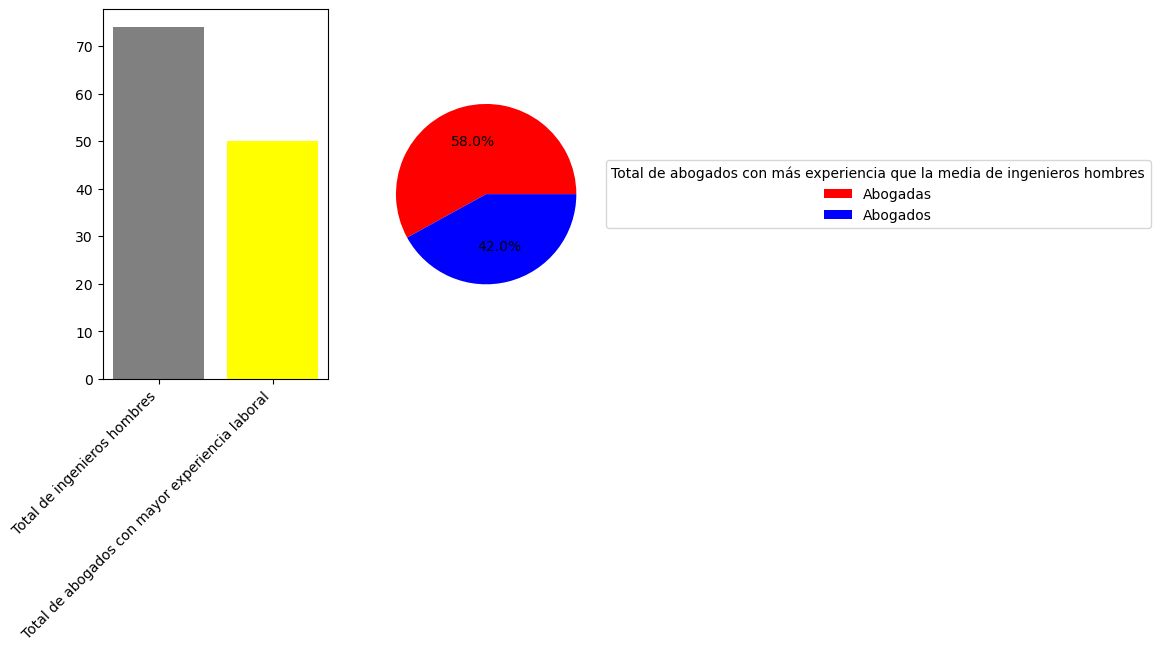

In [183]:
fig = plt.figure(figsize=(12, 12))
fig, (ax1, ax2) = plt.subplots(1, 2)

#Grafico de barras
ax1.bar(bar_labels, bar_data, color=colors)
ax1.set_xticks(np.arange(len(bar_labels)))
ax1.set_xticklabels(bar_labels, rotation=45, ha='right')

# Gráfico circular
ax2.pie(lawyers_count, autopct='%1.1f%%', colors=colors_pie)
ax2.legend(title='Total de abogados con más experiencia que la media de ingenieros hombres', labels = pie_labels , loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### Dibuja la distribución de abogados en función de su gasto anual (utiliza franjas de gasto) y de su sexo.

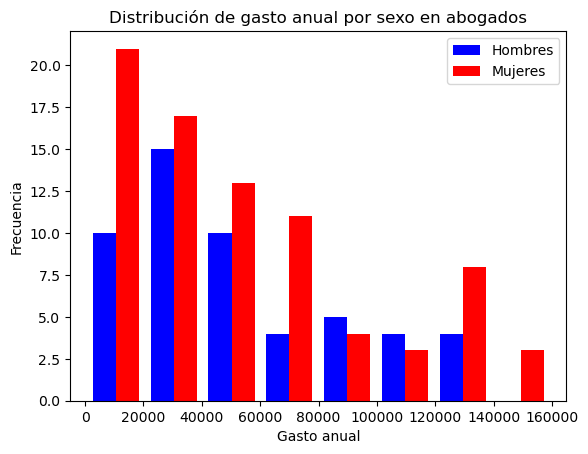

In [184]:
colors = ['blue', 'red']

plt.hist([df_lawyers[df_lawyers['Gender'] == 'Male']['Annual Spending'], df_lawyers[df_lawyers['Gender'] == 'Female']['Annual Spending']], color = colors,
         bins=8,
         label=['Hombres', 'Mujeres'])

# Añadimos leyenda y título al gráfico
plt.legend()
plt.title('Distribución de gasto anual por sexo en abogados')
plt.xlabel('Gasto anual')
plt.ylabel('Frecuencia')

# Mostramos el gráfico
plt.show()

#### Añade algún análisis que creas que puede ser interesante explicando por pantalla el resultado del mismo.

Me parece interesante revisar dos correlaciones: La relacion entre el gasto anual y el sexo y la relacion entre el gasto y la edad.

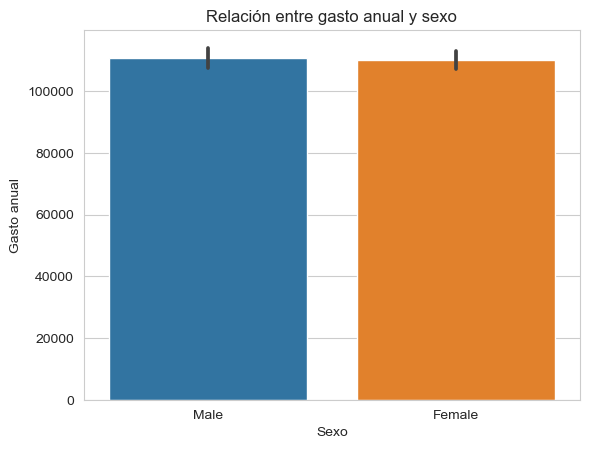

In [186]:
sns.set_style("whitegrid")

# Graficar los gastos anuales por sexo
sns.barplot(x="Gender", y="Annual Income ($)", data=df)

# Añadir títulos y etiquetas de los ejes
plt.title("Relación entre gasto anual y sexo")
plt.xlabel("Sexo")
plt.ylabel("Gasto anual")

# Mostrar el gráfico
plt.show()

No hay una diferencia importante del gasto entre mujeres y hombres.

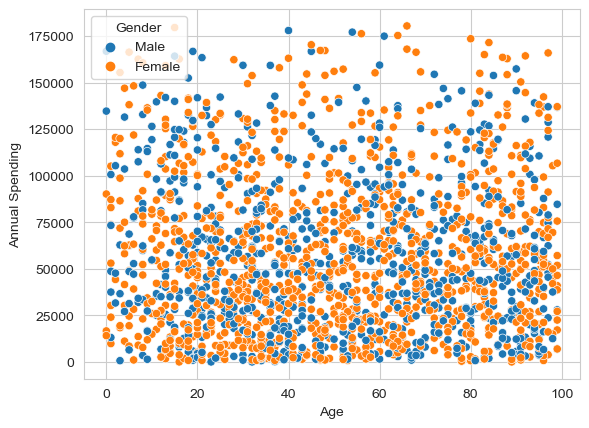

In [190]:
sns.scatterplot(data=df, x='Age', y='Annual Spending', hue='Gender')

plt.show()

No podemos apreciar nada a simple vista, veamoslo mejor por rangos de edad y en un gráfico de barras.

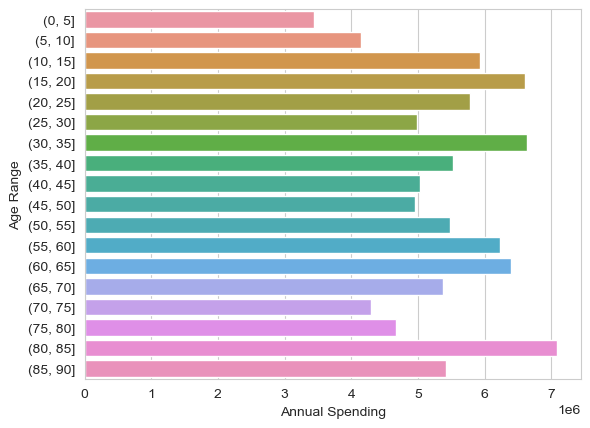

In [212]:
# crear una nueva columna con los rangos de edad
df['Age Range'] = pd.cut(df['Age'], bins=list(range(0, 91, 5)))

# agrupar los datos por rango de edad y sumar los gastos anuales
gastos_edad = df.groupby('Age Range')['Annual Spending'].sum().reset_index()

# crear un gráfico de barras
sns.barplot(data=gastos_edad, x='Annual Spending', y='Age Range', orient='h')

plt.show()

Después de analizar los datos de gastos, podemos concluir que el **Annual Spending está más relacionado con la edad que con el sexo**. Encontramos que las franjas de edad entre 80-85, 60-65, 30-35 y 15-20 años son las que más gastan en promedio. Esto sugiere que la edad es un factor importante a considerar al analizar los patrones de gastos y que los responsables de marketing deberían tener en cuenta las preferencias de gasto de diferentes grupos de edad al diseñar sus estrategias para este grupo de clientes.